In [3]:
from IPython.core.display import display
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

In [4]:
embeddings = {
    # 'SWEBOK': {'file': './swebok/swebok.txt.glove.074.txt.wv'}
}
direct = '../embeddings/one-year-increments-five-year-window/'
for file in glob.glob(f"{direct}*.wv"):
    year = os.path.basename(file)[2:4]
    embeddings[f'IEEE_{year}s'] = {'file':file}

print(embeddings)


for emb in embeddings:
    embeddings[emb]['kv'] = KeyedVectors.load_word2vec_format(embeddings[emb]['file'], binary=False)

{'IEEE_71s': {'file': '../embeddings/one-year-increments-five-year-window\\1971_to_1976_one-year.txt.glove.010.txt.wv'}, 'IEEE_72s': {'file': '../embeddings/one-year-increments-five-year-window\\1972_to_1977_one-year.txt.glove.007.txt.wv'}, 'IEEE_73s': {'file': '../embeddings/one-year-increments-five-year-window\\1973_to_1978_one-year.txt.glove.005.txt.wv'}, 'IEEE_74s': {'file': '../embeddings/one-year-increments-five-year-window\\1974_to_1979_one-year.txt.glove.006.txt.wv'}, 'IEEE_75s': {'file': '../embeddings/one-year-increments-five-year-window\\1975_to_1980_one-year.txt.glove.005.txt.wv'}, 'IEEE_76s': {'file': '../embeddings/one-year-increments-five-year-window\\1976_to_1981_one-year.txt.glove.003.txt.wv'}, 'IEEE_77s': {'file': '../embeddings/one-year-increments-five-year-window\\1977_to_1982_one-year.txt.glove.004.txt.wv'}, 'IEEE_78s': {'file': '../embeddings/one-year-increments-five-year-window\\1978_to_1983_one-year.txt.glove.002.txt.wv'}, 'IEEE_79s': {'file': '../embeddings/one

In [5]:
def testcases(positive="", negative="", top_n = 20):
    data = pd.DataFrame()
    print("Positive: " + " ".join(positive))
    print("Negative: " + " ".join(negative))
    if len(" ".join(negative)) != 0:
        print("X = " + " + ".join(positive) + " - " + " - ".join(negative))
    else:
        print("X = " + " + ".join(positive))
    print("Top-N: " + str(top_n))
    for embx in embeddings:
        try:
            closest_words = embeddings[embx]['kv'].most_similar(positive=positive, negative=negative, topn=top_n)

            data[embx] = dict(closest_words).keys()
        except KeyError:
            continue
    display(data)

    print(data.to_string())
    data.to_csv(f"{'_'.join(positive)}_{'_'.join(positive)}.csv")
    print("\n")

def selected_testcases(keys = [], positive="", negative="", top_n = 20):
    data = pd.DataFrame()
    print("Positive: " + " ".join(positive))
    print("Negative: " + " ".join(negative))
    if len(" ".join(negative)) != 0:
        print("X = " + " + ".join(positive) + " - " + " - ".join(negative))
    else:
        print("X = " + " + ".join(positive))
    print("Top-N: " + str(top_n))
    if not keys:
        for embx in embeddings:
            try:
                closest_words = embeddings[embx]['kv'].most_similar(positive=positive, negative=negative, topn=top_n)

                data[embx] = dict(closest_words).keys()
            except KeyError:
                continue
    else:
        for keyed in keys:
            try:
                closest_words = embeddings[keyed]['kv'].most_similar(positive=positive, negative=negative, topn=top_n)

                data[embx] = dict(closest_words).keys()
            except KeyError:
                continue


    print(data.to_string())
    print("\n")

def rank_of_most_similar_word(most_similar_word, positive = "", negative = "", top_n = 1000000000):
    results = []
    tmp_results = []
    for embxx in embeddings:
        if tmp_results:
            # print(tmp_results)
            results.append(min(tmp_results))
            tmp_results = []
        words = find_root_word(most_similar_word, embxx)
        for index, the_word in enumerate(words):
            try:
                l =  embeddings[embxx]['kv'].most_similar(positive=positive, negative=negative, topn=top_n)
                for i, sim_tuple in enumerate(l):
                    if sim_tuple[0] == "".join(the_word):
                        tmp_results.append([embxx, i+1, the_word])
                        break
            except KeyError:
                continue

    cleaner_results = return_year(results)
    return results, cleaner_results

def find_root_word(root_word_of_interest, key):
    import re
    hen = []
    _vocab_ = list(embeddings[key]['kv'].vocab)
    for word in _vocab_:
        current__ = re.findall(fr"\b{root_word_of_interest}[a-zA-Z]*\b", word)
        if current__:
            hen.append(current__)
    return hen

def return_year(j_list, swe_off = False):
    import re
    result = []
    for i in j_list:
        if i[0] == "SWEBOK":
            result.append(['SWEBOK', i[1]])
        else:
            pattern_match = int("".join(re.findall(pattern=r"[0-9]+", string=i[0])))
            if pattern_match > 30:
                pattern_match += 1900
            else:
                pattern_match += 2000
            result.append([pattern_match, i[1]])
    return result

def csv_writer(words, a_list, file_name):
    import csv
    fields = ['Year', 'min_rank']
    with open(file_name, 'a') as f:

        write = csv.writer(f)
        f.write(f"{words}\n")
        write.writerow(fields)
        write.writerows(a_list)


def plot_ranking(words, the_ranking_list, save_file = "tmp", save_flag = False):
    csv_writer(words=words, a_list=the_ranking_list, file_name=f"{save_file}.csv")
    print(words)
    get_ranks = [x[1] for x in the_ranking_list]
    x_ticks = [x[0] for x in the_ranking_list]
    plt.plot(x_ticks, get_ranks, linestyle = '--', marker = 'o', color = 'b')
    plt.suptitle(words, fontsize = 16)
    if save_flag:
        plt.savefig(f"{save_file}.png")
    plt.show()

def file_name_generator(most_similar_word, positive = [], save_file = True):
    if save_file:
        save_file_name = most_similar_word + "_" + "_".join(positive)
        return save_file_name
    else:
        plt_title = most_similar_word.upper() + " | " + " + ".join(positive).upper()
        return plt_title

In [6]:
testcases(['defect', 'classification'], top_n=5)
testcases(['code', 'smells'], top_n=5)

Positive: defect classification
Negative: 
X = defect + classification
Top-N: 5
      IEEE_84s     IEEE_85s  IEEE_86s    IEEE_87s    IEEE_88s      IEEE_89s           IEEE_90s      IEEE_91s          IEEE_92s    IEEE_93s       IEEE_94s        IEEE_95s   IEEE_96s     IEEE_97s    IEEE_98s      IEEE_99s      IEEE_00s         IEEE_01s     IEEE_02s    IEEE_03s     IEEE_04s     IEEE_05s    IEEE_06s    IEEE_07s      IEEE_08s       IEEE_09s       IEEE_10s    IEEE_11s     IEEE_12s       IEEE_13s       IEEE_14s       IEEE_15s       IEEE_16s                IEEE_17s    IEEE_18s    IEEE_19s
0     airplane     airplane   removal     removal     removal        repair          detection       coupled         community   presented  dependability         removal  framework  life-cycles   framework     obviously       content   data-intensive  pre-release  predictors   correction      density  prediction  prediction    prediction     prediction     prediction  prediction   prediction     prediction     pre

,IEEE_84s,IEEE_85s,IEEE_86s,IEEE_87s,IEEE_88s,IEEE_89s,IEEE_90s,IEEE_91s,IEEE_92s,IEEE_93s,...,IEEE_10s,IEEE_11s,IEEE_12s,IEEE_13s,IEEE_14s,IEEE_15s,IEEE_16s,IEEE_17s,IEEE_18s,IEEE_19s
0,airplane,airplane,removal,removal,removal,repair,detection,coupled,community,presented,...,prediction,prediction,prediction,prediction,prediction,prediction,prediction,concept-based,prediction,prediction
1,discovery,locks,airplane,airplane,well-known,removal,removal,assisting,model-checking,ru,...,cross-company,taxonomies,ccdp,concept-based,concept-based,concept-based,concept-based,prediction,models,models
2,decision,discovery,decision,write,airplane,illustrating,sciences,parsing,interconnections,positively,...,taxonomies,ccdp,re-assigned,re-assigned,cross-company,models,one-class,cross-domain,using,learning
3,constraints,cooperating,trees,trees,reports,updating,control-intensive,dramatically,follows,analysis,...,detection,models,defects,ssdp,re-assigned,learning,learning,learning,learning,model
4,service,formalism,atomic,arithmetic,guaranteed,comput,days,structured,recently,experiment,...,ccdp,scheme,taxonomies,jit,effort-aware,re-assigned,performance,predictionlocalization,techniques,proposed


,IEEE_98s,IEEE_99s,IEEE_00s,IEEE_01s,IEEE_02s,IEEE_03s,IEEE_04s,IEEE_05s,IEEE_06s,IEEE_07s,...,IEEE_10s,IEEE_11s,IEEE_12s,IEEE_13s,IEEE_14s,IEEE_15s,IEEE_16s,IEEE_17s,IEEE_18s,IEEE_19s
0,source,source,problem,model,system,use,analysis,antipatterns,design,design,...,source,source,source,source,source,source,source,source,developers,developers
1,design,data,based,program,source,using,source,source,source,source,...,bad,cells,detection,developers,review,developers,developers,developers,software,use
2,process,program,program,dynamic,software,source,two,bad,information,tools,...,developers,paper,paper,paper,results,quality,paper,paper,changes,paper
3,new,programs,used,existing,techniques,analysis,use,type-checking,analysis,existing,...,study,however,changes,study,quality,study,identify,study,identify,study
4,approach,tools,developed,source,design,system,using,envy,two,new,...,paper,study,developers,identify,publishers,paper,study,sub-optimal,techniques,source


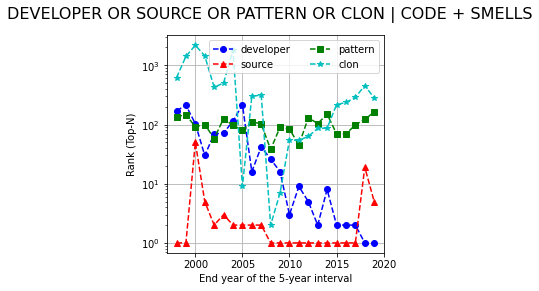

In [7]:
positive = ['code', 'smells']
most_similar_word = 'developer'

j, clean_j = rank_of_most_similar_word(most_similar_word, positive = positive)


positive = ['code', 'smells']
most_similar_word = 'source'

k, clean_k = rank_of_most_similar_word(most_similar_word, positive = positive)

positive = ['code', 'smells']
most_similar_word = 'pattern'


l, clean_l = rank_of_most_similar_word(most_similar_word, positive = positive)

positive = ['code', 'smells']
most_similar_word = 'clon'

o, clean_o = rank_of_most_similar_word(most_similar_word, positive = positive)

save_file = "code_smell_five_prefixes"
fig = plt.figure()
ax = fig.add_subplot()
get_ranks_j = [x[1] for x in clean_j]
x_ticks_j = [x[0] for x in clean_j]
line_j, = plt.plot(x_ticks_j, get_ranks_j, linestyle = '--', marker = 'o', color = 'b')
line_j.set_label("developer")

get_ranks_k = [x[1] for x in clean_k]
x_ticks_k = [x[0] for x in clean_k]
line_k, = plt.plot(x_ticks_k, get_ranks_k, linestyle = '--', marker = '^', color = 'r')
line_k.set_label("source")

get_ranks_l = [x[1] for x in clean_l]
x_ticks_l = [x[0] for x in clean_l]
line_l, = plt.plot(x_ticks_l, get_ranks_l, linestyle = '--', marker = 's', color = 'g')
line_l.set_label("pattern")


get_ranks_o = [x[1] for x in clean_o]
x_ticks_o = [x[0] for x in clean_o]
line_o, = plt.plot(x_ticks_o, get_ranks_o, linestyle = '--', marker = '*', color = 'c')
line_o.set_label("clon")

plt.yscale("log")
plt.grid()
plt.ylabel("Rank (Top-N)")
plt.xlabel("End year of the 5-year interval")
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

plt.legend(loc=1, ncol=2)
plt.suptitle("DEVELOPER OR SOURCE OR PATTERN OR CLON | CODE + SMELLS", fontsize = 16)
plt.show()


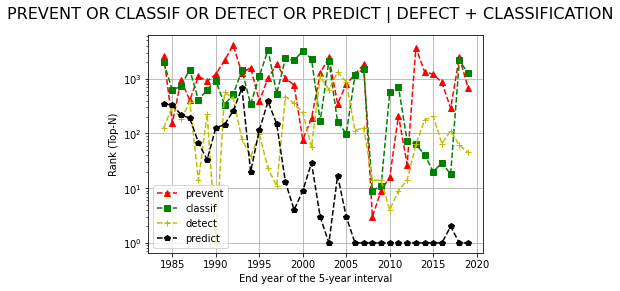

In [8]:
positive = ['defect', 'classification']
most_similar_word = 'prevent'

k, clean_k = rank_of_most_similar_word(most_similar_word, positive = positive)

positive = ['defect', 'classification']
most_similar_word = 'classif'

l, clean_l = rank_of_most_similar_word(most_similar_word, positive = positive)

positive = ['defect', 'classification']
most_similar_word = 'detect'

m, clean_m = rank_of_most_similar_word(most_similar_word, positive = positive)

positive = ['defect', 'classification']
most_similar_word = 'predict'

n, clean_n = rank_of_most_similar_word(most_similar_word, positive = positive)

save_file = "log_combination_file_defect_classification"

get_ranks_k = [x[1] for x in clean_k]
x_ticks_k = [x[0] for x in clean_k]
line_k, = plt.plot(x_ticks_k, get_ranks_k, linestyle = '--', marker = '^', color = 'r')
line_k.set_label("prevent")

get_ranks_l = [x[1] for x in clean_l]
x_ticks_l = [x[0] for x in clean_l]
line_l, = plt.plot(x_ticks_l, get_ranks_l, linestyle = '--', marker = 's', color = 'g')
line_l.set_label("classif")

get_ranks_m = [x[1] for x in clean_m]
x_ticks_m = [x[0] for x in clean_m]
line_m, = plt.plot(x_ticks_m, get_ranks_m, linestyle = '--', marker = '+', color = 'y')
line_m.set_label("detect")

get_ranks_n = [x[1] for x in clean_n]
x_ticks_n = [x[0] for x in clean_n]
line_n, = plt.plot(x_ticks_n, get_ranks_n, linestyle = '--', marker = 'p', color = 'k')
line_n.set_label("predict")


plt.yscale("log")
plt.grid()
plt.ylabel("Rank (Top-N)")
plt.xlabel("End year of the 5-year interval")
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

plt.legend(loc=3, ncol=1)
plt.suptitle("PREVENT OR CLASSIF OR DETECT OR PREDICT | DEFECT + CLASSIFICATION", fontsize = 16)
plt.show()